# Challenge

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Data/hawaii.sqlite")
Base = automap_base()

In [6]:
# reflect an existing database into a new model
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Displaying "measurement" table columns
columns = [m.key for m in Measurement.__table__.columns]
columns

['id', 'station', 'date', 'prcp', 'tobs']

In [11]:
# Displaying "station" table columns
columns = [m.key for m in Station.__table__.columns]
columns

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

## Climate Analysis for June 2017

In [12]:
# Design a query to retrieve the precipitation and tobs data for the month of June 2017.
 
# Starting from June, 1st 2017. 
start_june = dt.date(2017, 6, 1)

# Ending on June, 30th 2017
end_june = dt.date(2017, 6, 30)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs ).\
    filter(Measurement.date >= start_june).\
    filter(Measurement.date <= end_june).all()
results

# Save the query results as a Pandas DataFrame and set the index to the date column
june_df = pd.DataFrame(results, columns=['date','precipitation','tobs'])
june_df.set_index(june_df['date'], inplace=True)
june_df.index.names = ['Date']

# Sort the dataframe by date
june_df = june_df.sort_index()

june_df.head()

,date,precipitation,tobs
Date,,,
2017-06-01,2017-06-01,0.00,79.0
2017-06-01,2017-06-01,0.00,79.0
2017-06-01,2017-06-01,0.00,81.0
2017-06-01,2017-06-01,0.01,74.0
2017-06-01,2017-06-01,0.03,76.0


### Key statistical data about the month of June 2017

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
june_df.describe()

,precipitation,tobs
count,171.000000,191.000000
mean,0.120000,77.219895
std,0.217726,2.622538
min,0.000000,71.000000
25%,0.000000,75.000000
50%,0.020000,77.000000
75%,0.150000,79.000000
max,1.690000,83.000000


### Plotting few data about the month of June 2017 

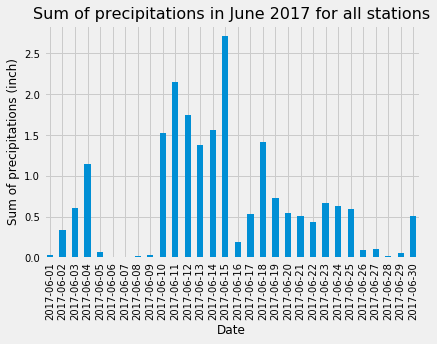

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data (precipitations)
june_prec_df = june_df[["date","precipitation"]].groupby("date").sum()
june_prec_df.plot(kind="bar",legend=None)
plt.title("Sum of precipitations in June 2017 for all stations",fontsize=16)
plt.ylabel("Sum of precipitations (inch)",fontsize=12)
plt.xlabel("Date",fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.savefig("Images/June_prec.png", bbox_inches='tight')

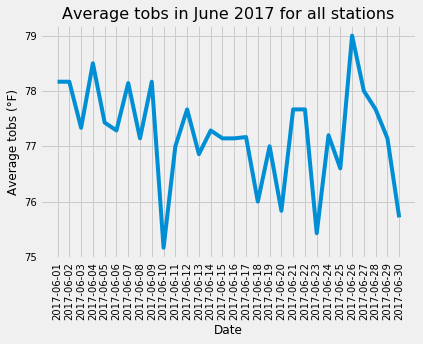

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data (tobs)
june_tobs_df = june_df[["date","tobs"]].groupby("date").mean()
june_tobs_df.plot(legend=None)
plt.title("Average tobs in June 2017 for all stations",fontsize=16)
plt.ylabel("Average tobs (°F)",fontsize=12)
plt.xlabel("Date",fontsize=12)
plt.xticks(rotation=90,fontsize=10)
plt.xticks(np.arange(len(june_df["date"].unique().tolist())),june_df["date"].unique().tolist())
plt.yticks(fontsize=10)
plt.savefig("Images/June_tobs.png", bbox_inches='tight')

## Climate Analysis for December 2016

In [16]:
# Design a query to retrieve the precipitation and tobs data for the month of December 2016.
 
# Starting from December, 1st 2016. 
start_dec = dt.date(2016, 12, 1)

# Ending on December, 31st 2016
end_dec = dt.date(2016, 12, 31)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs ).\
    filter(Measurement.date >= start_dec).\
    filter(Measurement.date <= end_dec).all()
results

# Save the query results as a Pandas DataFrame and set the index to the date column
dec_df = pd.DataFrame(results, columns=['date','precipitation','tobs'])
dec_df.set_index(dec_df['date'], inplace=True)
dec_df.index.names = ['Date']

# Sort the dataframe by date
dec_df = dec_df.sort_index()

dec_df.head()

,date,precipitation,tobs
Date,,,
2016-12-01,2016-12-01,0.12,75.0
2016-12-01,2016-12-01,0.16,76.0
2016-12-01,2016-12-01,0.07,75.0
2016-12-01,2016-12-01,0.37,74.0
2016-12-01,2016-12-01,0.33,73.0


### Key statistical data about the month of Dec 2016

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
dec_df.describe()

,precipitation,tobs
count,178.000000,200.000000
mean,0.199494,71.130000
std,0.342967,3.419292
min,0.000000,60.000000
25%,0.020000,69.000000
50%,0.060000,71.000000
75%,0.247500,74.000000
max,2.370000,78.000000


### Plotting few data about the month of Dec 2016 

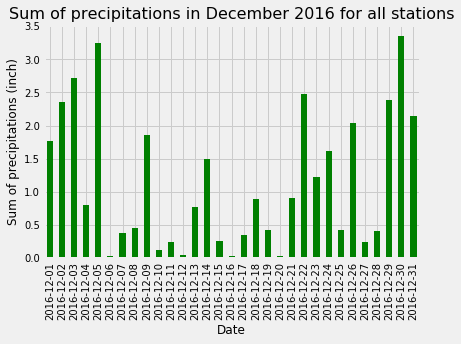

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data (precipitations)
dec_prec_df = dec_df[["date","precipitation"]].groupby("date").sum()
dec_prec_df.plot(kind="bar",legend=None,color="green")
plt.title("Sum of precipitations in December 2016 for all stations",fontsize=16)
plt.ylabel("Sum of precipitations (inch)",fontsize=12)
plt.xlabel("Date",fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.savefig("Images/Dec_prec.png", bbox_inches='tight')

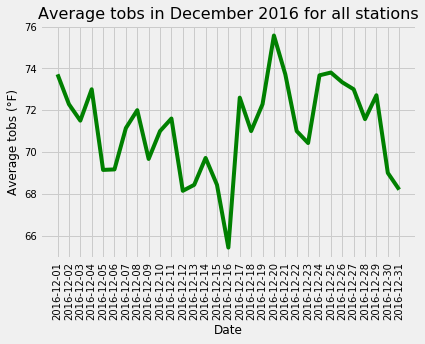

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data (tobs)
dec_tobs_df = dec_df[["date","tobs"]].groupby("date").mean()
dec_tobs_df.plot(legend=None,color="green")
plt.title("Average tobs in December 2016 for all stations",fontsize=16)
plt.ylabel("Average tobs (°F)",fontsize=12)
plt.xlabel("Date",fontsize=12)
plt.xticks(rotation=90,fontsize=10)
plt.xticks(np.arange(len(dec_df["date"].unique().tolist())),dec_df["date"].unique().tolist())
plt.yticks(fontsize=10)
plt.savefig("Images/Dec_tobs.png", bbox_inches='tight')

### Comparing data between the month of June 2017 and Dec 2016 

#### Building the recap dataframe


In [20]:
# Number or days (index for the recp dataframe)
id_day = [i for i in range(1,max(len(june_prec_df),len(june_tobs_df),len(dec_prec_df),len(dec_tobs_df))+1)]      

In [21]:
# Retrieving the data
total_prec_jun = june_df[["date","precipitation"]].groupby("date").sum()["precipitation"].tolist()
avg_tobs_jun = june_df[["date","tobs"]].groupby("date").mean()["tobs"].tolist()
total_prec_dec = dec_df[["date","precipitation"]].groupby("date").sum()["precipitation"].tolist()
avg_tobs_dec = dec_df[["date","tobs"]].groupby("date").mean()["tobs"].tolist()

In [22]:
# Standardizing the lists' length
while len(total_prec_jun)<len(id_day):
    total_prec_jun.append(np.nan)
while len(avg_tobs_jun)<len(id_day):
    avg_tobs_jun.append(np.nan)

In [23]:
# Creating the recap data frame
recap_df = pd.DataFrame({
             "Days": id_day,
             "Sum of precipitations in Jun 2017": total_prec_jun,
             "Sum of precipitations in Dec 2016": total_prec_dec,
             "Average tobs in Jun 2017": avg_tobs_jun,
             "Average tobs in Dec 2016": avg_tobs_dec})
recap_df.head()

,Days,Sum of precipitations in Jun 2017,Sum of precipitations in Dec 2016,Average tobs in Jun 2017,Average tobs in Dec 2016
0,1,0.04,1.77,78.166667,73.714286
1,2,0.34,2.36,78.166667,72.285714
2,3,0.61,2.71,77.333333,71.500000
3,4,1.15,0.80,78.500000,73.000000
4,5,0.08,3.24,77.428571,69.142857


#### Comparison plot

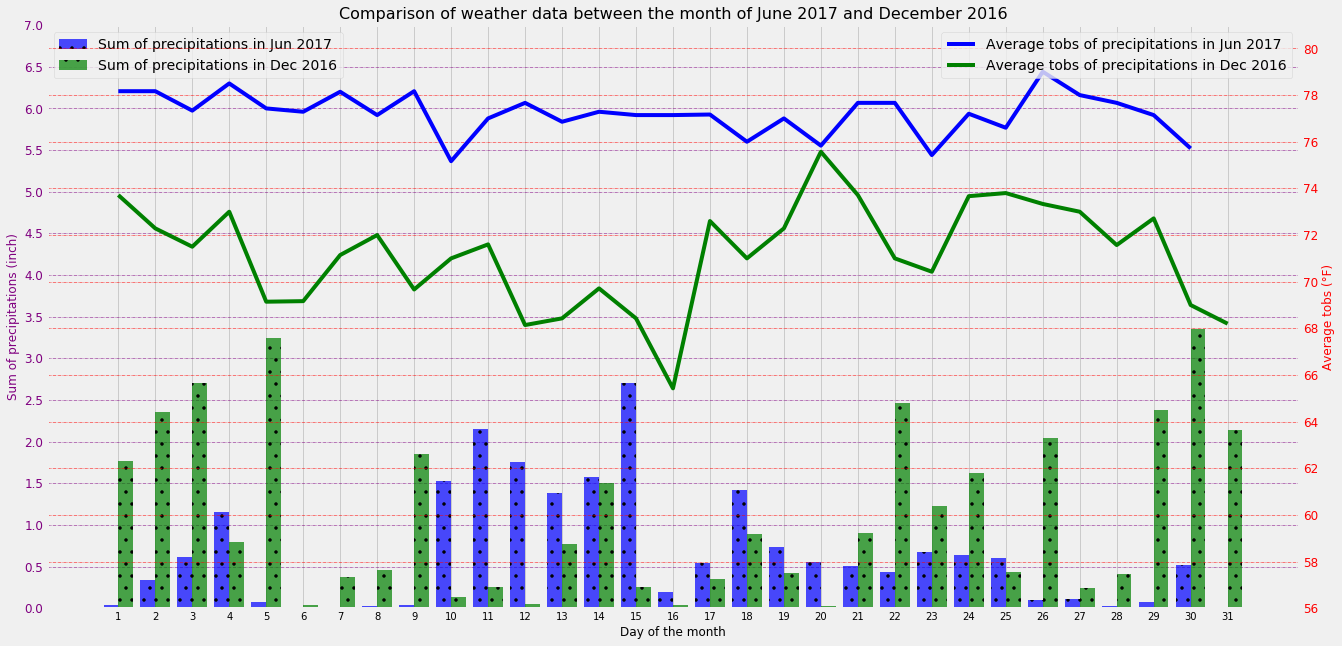

In [24]:
fig, ax1 = plt.subplots(figsize=(20, 10))

ax2 = ax1.twinx()

ax1.set_xticks(id_day)
ax1.tick_params(axis='x', labelsize=10)
ax1.set_xlabel("Day of the month",fontsize=12)

ax1.set(ylim=(0, 5))
ax1.set_yticks(np.arange(0, 7.1, step=0.5))
ax1.tick_params(axis='y', colors='purple')
ax1.grid(color='purple',axis='y',ls='-.',lw=0.5)
ax1.set_ylabel("Sum of precipitations (inch)",fontsize=12)
ax1.yaxis.label.set_color('purple')
ax1.tick_params(axis='y', labelsize=12)


ax2.set(ylim=(60, 81))
ax2.set_yticks(np.arange(56, 81, step=2))
ax2.tick_params(axis='y', colors='r')
ax2.grid(color='r',axis='y',ls='-.',lw=0.5)
ax2.set_ylabel("Average tobs (°F)",fontsize=12)
ax2.yaxis.label.set_color('r')
ax2.tick_params(axis='y', labelsize=12)


ax1.bar(recap_df["Days"]-0.2, recap_df["Sum of precipitations in Jun 2017"], color ="blue", width=0.4, align='center', label='Sum of precipitations in Jun 2017', hatch='.', alpha = 0.7)
ax1.bar(recap_df["Days"]+0.2, recap_df["Sum of precipitations in Dec 2016"], color ="green", width=0.4, align='center', label='Sum of precipitations in Dec 2016', hatch='.', alpha = 0.7)
ax2.plot(recap_df["Days"], recap_df["Average tobs in Jun 2017"], color ="blue", label='Average tobs of precipitations in Jun 2017')
ax2.plot(recap_df["Days"], recap_df["Average tobs in Dec 2016"], color ="green", label='Average tobs of precipitations in Dec 2016')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_title('Comparison of weather data between the month of June 2017 and December 2016', fontsize=16)
fig.savefig("Images/Recap.png", bbox_inches='tight')


#### Findings

First, we could notice that for June 2017 and December 2016, we had about the same number of data for precipitations and tobs (about 200).

Regarding tobs:
- From the summary statistics
    - For both months, data are symmetric as mean almost tied with the median. Standard deviation is also quite low, so the temperatures are not too spread from the mean
    - The month of June was in average warmer (77°F vs. 71°F), had a superior max temperature of 83°F (vs. 78°F) and its colder day (71°F) was much warmer than the one in December (60°F).

- From the comparison plot
    - The plot shows us that the month of December was indeed colder but values are in the same order


Regarding precipitations:
- From the summary statistics
    - Unlike for tobs, data are right skewed and standard deviation is very important: some days should be really rainy and other not so much for both months.
    - The month of December is, in average, almost twice as rainy as the month of June (0.20 inch vs 0.12 inch)
    - For June, we could notice also that at least 25% of measurement did not detect rain (first quartile value is 0.00 inch)
- From the comparison plot
    - The results are less explicit that the summary statistics might has let us believed:
        - In December there were 13 days with a total amount of precipitations above 1 inch. For June, only 8 days.
        - It did not rain or barely 10 days in June and only 5 days in December
        - However, it rains more in June than in December during 13 days



#### Recommendation for further analysis

In order to strengthen our analysis, we would recommend to:
 - Gather the data for all years available as June 2017 might have been particularly hot and dry and December 2016 particularly cold and rainy. Thus, we could have a more accurate definition of a typical month of June and December in Oahu 
 - Then, we could sort the data and only keep the measurement for daylight or for the expected operational hours of the store (people will not surf in night and it could rain during this time) 
 - Try the refine by station location in order to the select the dryer location to implement the store